# Census Income Data Set 

Abstract: Predict whether income exceeds $50K/yr based on census data. Also known as "Adult" dataset.

In [65]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
from matplotlib import pyplot as plt
%matplotlib inline

# Load the Data

In [6]:
col_names=['age',
            'workclass',
            'fnlwgt',
            'education',
            'education-num',
            'marital-status',
            'occupation',
            'relationship',
            'race',
            'sex',
            'capital-gain',
            'capital-loss',
            'hours-per-week',
            'native-country',
            'inc_class']


In [7]:
ds=pd.read_csv('adult.data', ',', names=col_names, index_col=False)
ds.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,inc_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
ds.shape

(32561, 15)

# Data exploration

In [76]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
inc_class         32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Describe (stats)

In [27]:
ds.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [30]:
ds.describe(include=['O'])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,inc_class
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


## Unique values

In [77]:
cat_cols=list(ds.dtypes[ds.dtypes=='object'].index)[:-1]

In [78]:
for c in cat_cols:
    print(c)
    print('========')
    print(ds[c].unique())
    print()

workclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

marital-status
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

occupation
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']

relationship
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']

race
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']

sex
[' Male' ' Female']

native-country
[' United-States' ' Cuba' ' Jamaica' ' I

## Group

In [54]:
def gr_col(col):
    print(col)
    print('============')
    display(ds[['inc_class',col,'fnlwgt']].groupby(['inc_class',col]).count())
    ds[ds.inc_class==' >50K'][['inc_class',col,'fnlwgt']].groupby(['inc_class',col]).count().plot(kind='pie', subplots=True, figsize=(15,15), title=col)
    ds[ds.inc_class==' <=50K'][['inc_class',col,'fnlwgt']].groupby(['inc_class',col]).count().plot(kind='pie', subplots=True, figsize=(15,15))
    print()

workclass


fnlwgt
inc_class workclass                
 <=50K     ?                   1645
           Federal-gov          589
           Local-gov           1476
           Never-worked           7
           Private            17733
           Self-emp-inc         494
           Self-emp-not-inc    1817
           State-gov            945
           Without-pay           14
 >50K      ?                    191
           Federal-gov          371
           Local-gov            617
           Private             4963
           Self-emp-inc         622
           Self-emp-not-inc     724
           State-gov            353


education


fnlwgt
inc_class education            
 <=50K     10th             871
           11th            1115
           12th             400
           1st-4th          162
           5th-6th          317
           7th-8th          606
           9th              487
           Assoc-acdm       802
           Assoc-voc       1021
           Bachelors       3134
           Doctorate        107
           HS-grad         8826
           Masters          764
           Preschool         51
           Prof-school      153
           Some-college    5904
 >50K      10th              62
           11th              60
           12th              33
           1st-4th            6
           5th-6th           16
           7th-8th           40
           9th               27
           Assoc-acdm       265
           Assoc-voc        361
           Bachelors       2221
           Doctorate        306
           HS-grad         1675
           Masters          959
           Prof-school      423
           Some-college    1387


marital-status


fnlwgt
inc_class marital-status                
 <=50K     Divorced                 3980
           Married-AF-spouse          13
           Married-civ-spouse       8284
           Married-spouse-absent     384
           Never-married           10192
           Separated                 959
           Widowed                   908
 >50K      Divorced                  463
           Married-AF-spouse          10
           Married-civ-spouse       6692
           Married-spouse-absent      34
           Never-married             491
           Separated                  66
           Widowed                    85


occupation


fnlwgt
inc_class occupation                
 <=50K     ?                    1652
           Adm-clerical         3263
           Armed-Forces            8
           Craft-repair         3170
           Exec-managerial      2098
           Farming-fishing       879
           Handlers-cleaners    1284
           Machine-op-inspct    1752
           Other-service        3158
           Priv-house-serv       148
           Prof-specialty       2281
           Protective-serv       438
           Sales                2667
           Tech-support          645
           Transport-moving     1277
 >50K      ?                     191
           Adm-clerical          507
           Armed-Forces            1
           Craft-repair          929
           Exec-managerial      1968
           Farming-fishing       115
           Handlers-cleaners      86
           Machine-op-inspct     250
           Other-service         137
           Priv-house-serv         1
           Prof-specialty       1859
           Protective-serv       211
           Sales                 983
           Tech-support          283
           Transport-moving      320


relationship


fnlwgt
inc_class relationship           
 <=50K     Husband           7275
           Not-in-family     7449
           Other-relative     944
           Own-child         5001
           Unmarried         3228
           Wife               823
 >50K      Husband           5918
           Not-in-family      856
           Other-relative      37
           Own-child           67
           Unmarried          218
           Wife               745


race


fnlwgt
inc_class race                       
 <=50K     Amer-Indian-Eskimo     275
           Asian-Pac-Islander     763
           Black                 2737
           Other                  246
           White                20699
 >50K      Amer-Indian-Eskimo      36
           Asian-Pac-Islander     276
           Black                  387
           Other                   25
           White                 7117


sex


fnlwgt
inc_class sex            
 <=50K     Female    9592
           Male     15128
 >50K      Female    1179
           Male      6662


native-country


fnlwgt
inc_class native-country                     
 <=50K     ?                              437
           Cambodia                        12
           Canada                          82
           China                           55
           Columbia                        57
           Cuba                            70
           Dominican-Republic              68
           Ecuador                         24
           El-Salvador                     97
           England                         60
           France                          17
           Germany                         93
           Greece                          21
           Guatemala                       61
           Haiti                           40
           Holand-Netherlands               1
           Honduras                        12
           Hong                            14
           Hungary                         10
           India                           60
           Iran                            25
           Ireland                         19
           Italy                           48
           Jamaica                         71
           Japan                           38
           Laos                            16
           Mexico                         610
           Nicaragua                       32
           Outlying-US(Guam-USVI-etc)      14
           Peru                            29
...                                       ...
 >50K      France                          12
           Germany                         44
           Greece                           8
           Guatemala                        3
           Haiti                            4
           Honduras                         1
           Hong                             6
           Hungary                          3
           India                           40
           Iran                            18
           Ireland                          5
           Italy                           25
           Jamaica                         10
           Japan                           24
           Laos                             2
           Mexico                          33
           Nicaragua                        2
           Peru                             2
           Philippines                     61
           Poland                          12
           Portugal                         4
           Puerto-Rico                     12
           Scotland                         3
           South                           16
           Taiwan                          20
           Thailand                         3
           Trinadad&Tobago                  2
           United-States                 7171
           Vietnam                          5
           Yugoslavia                       6

[82 rows x 1 columns]

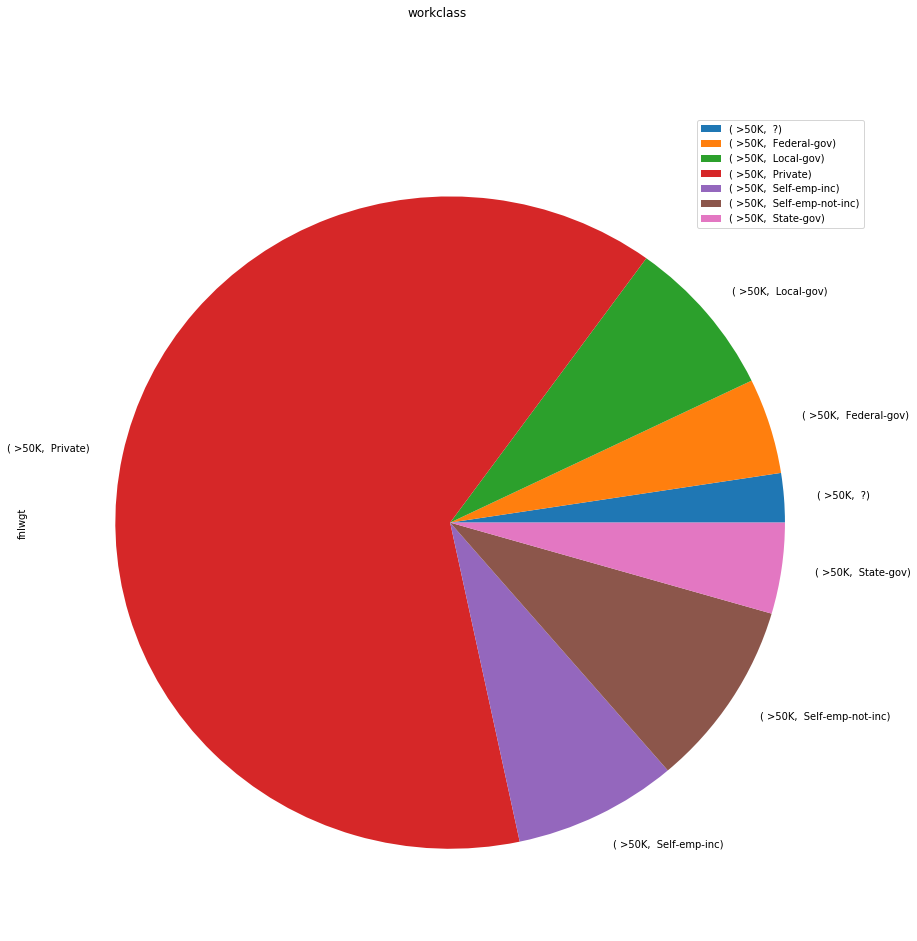

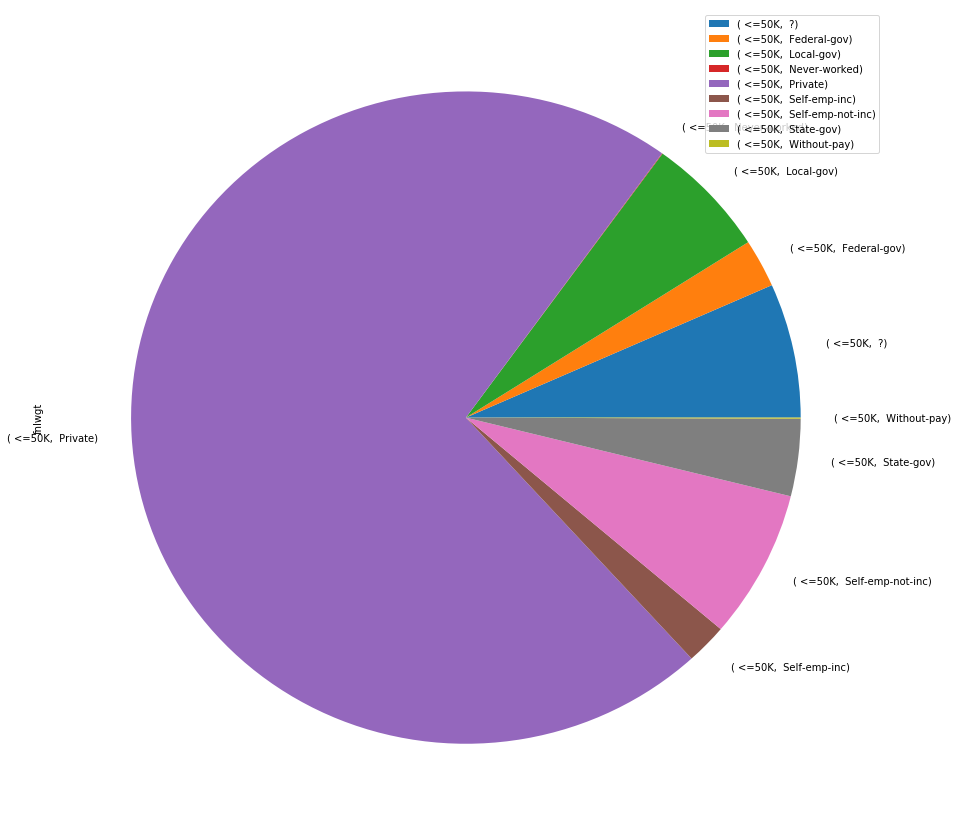

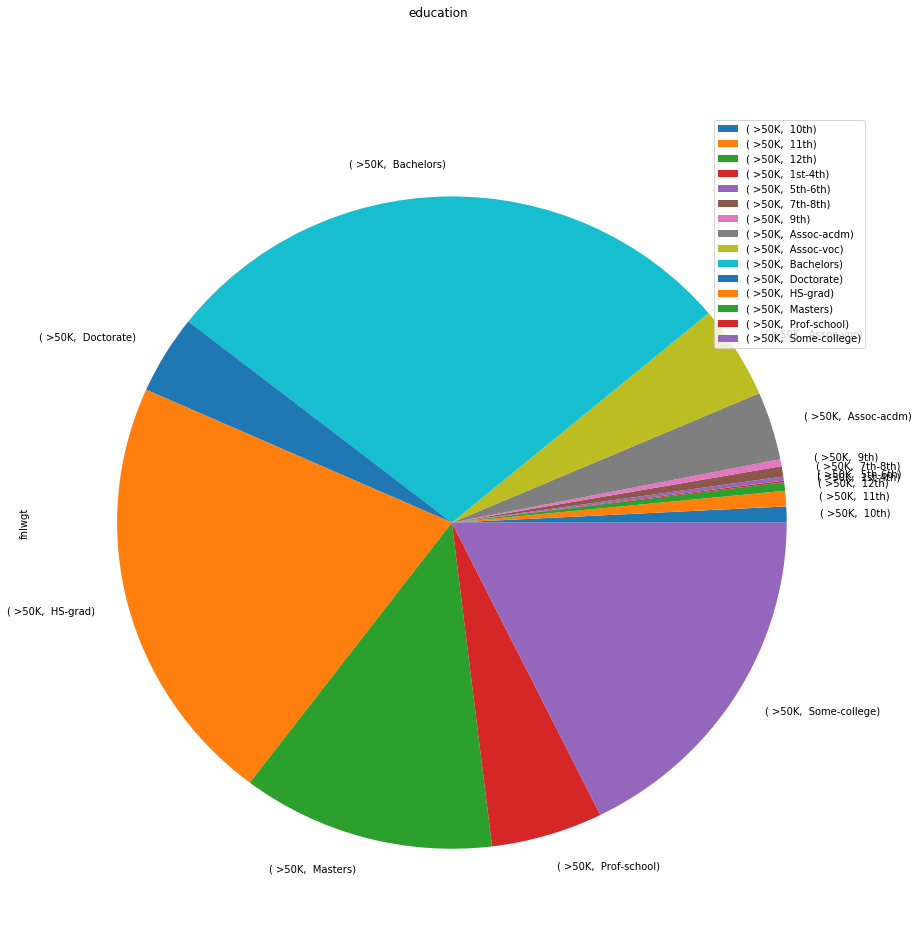

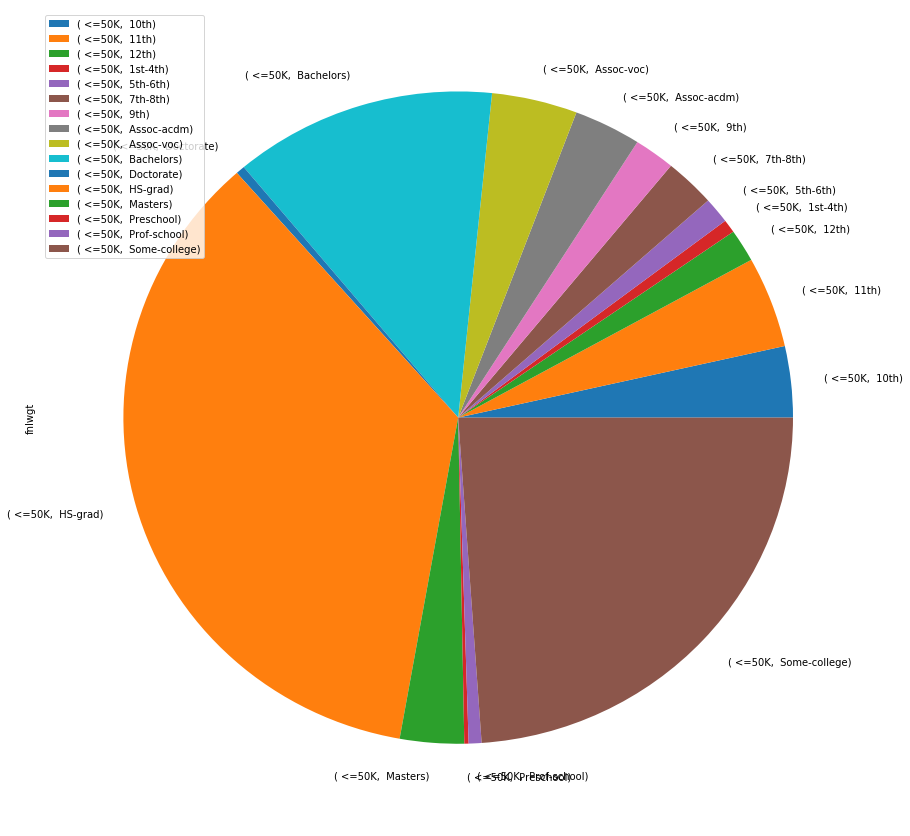

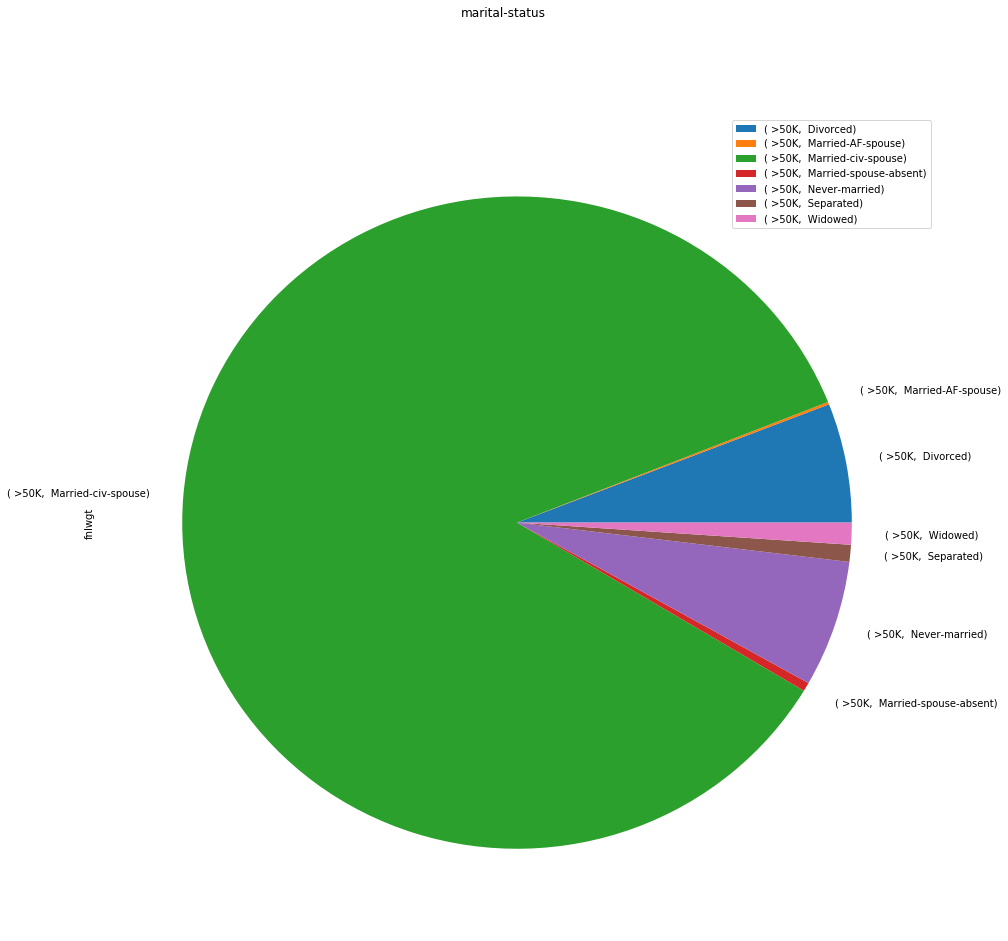

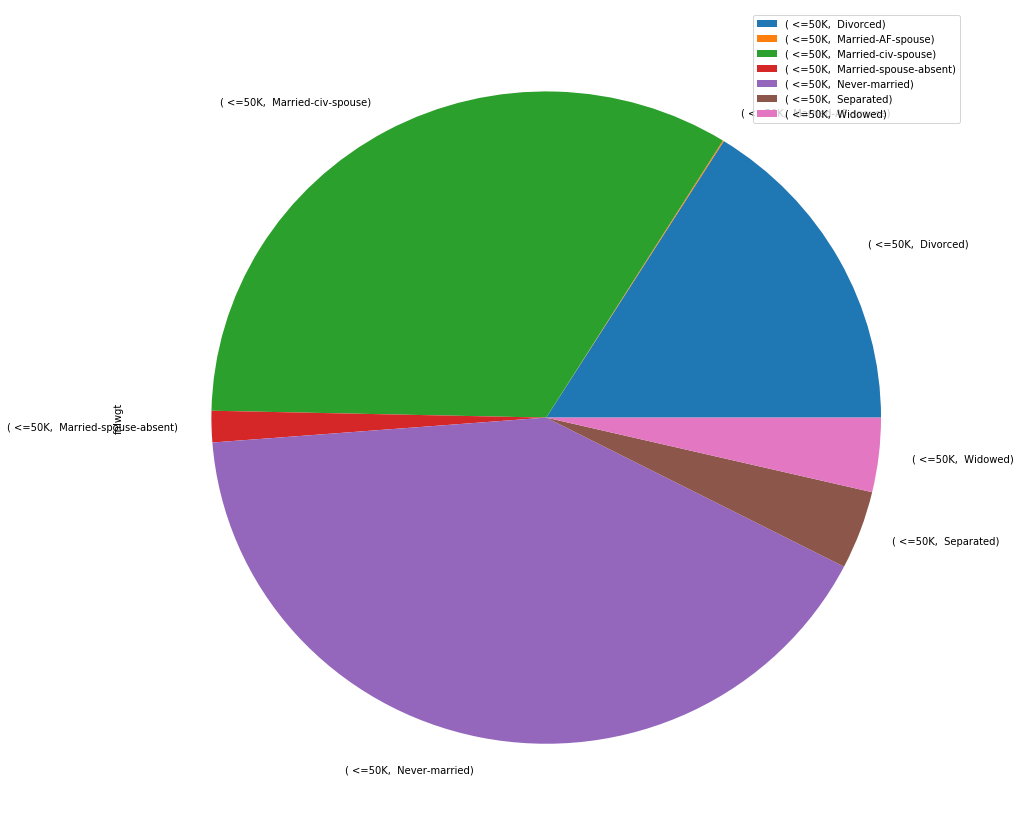

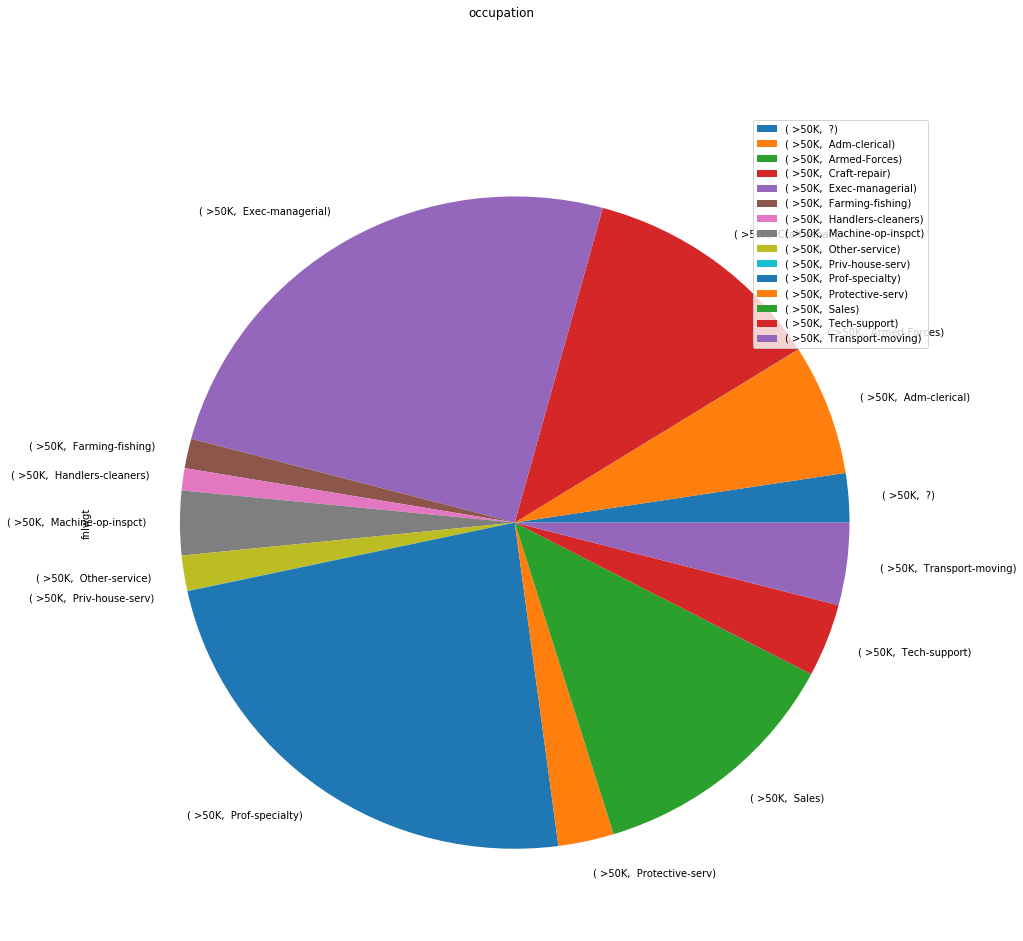

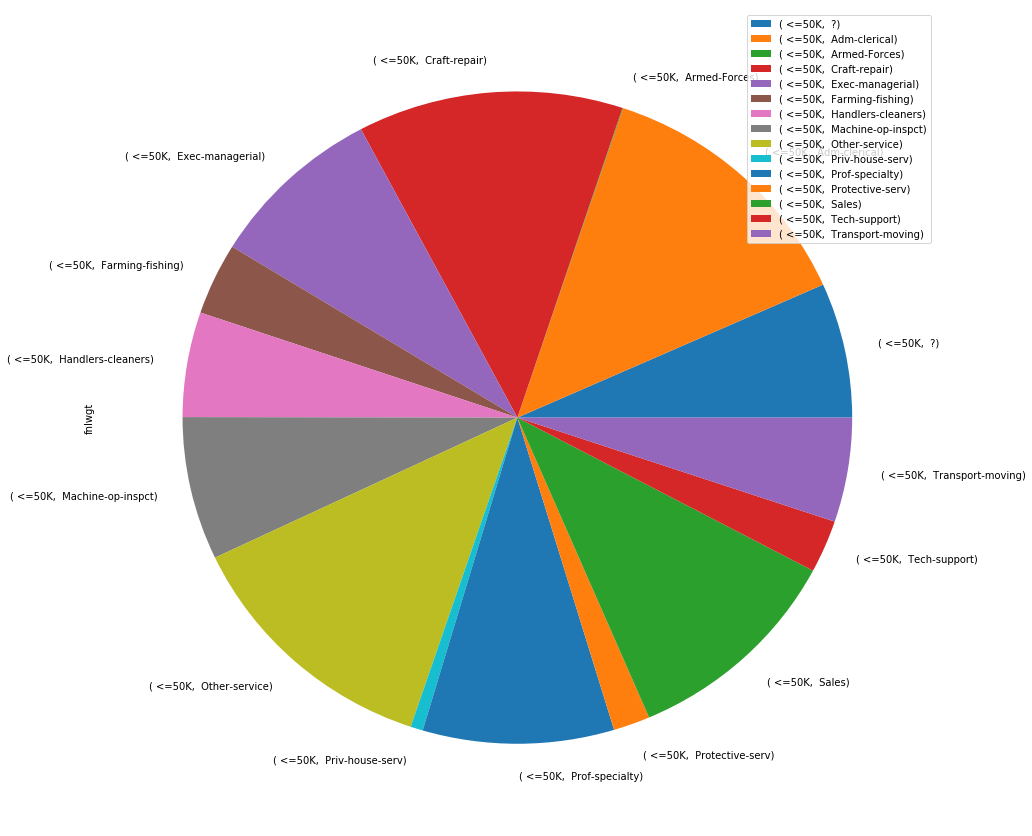

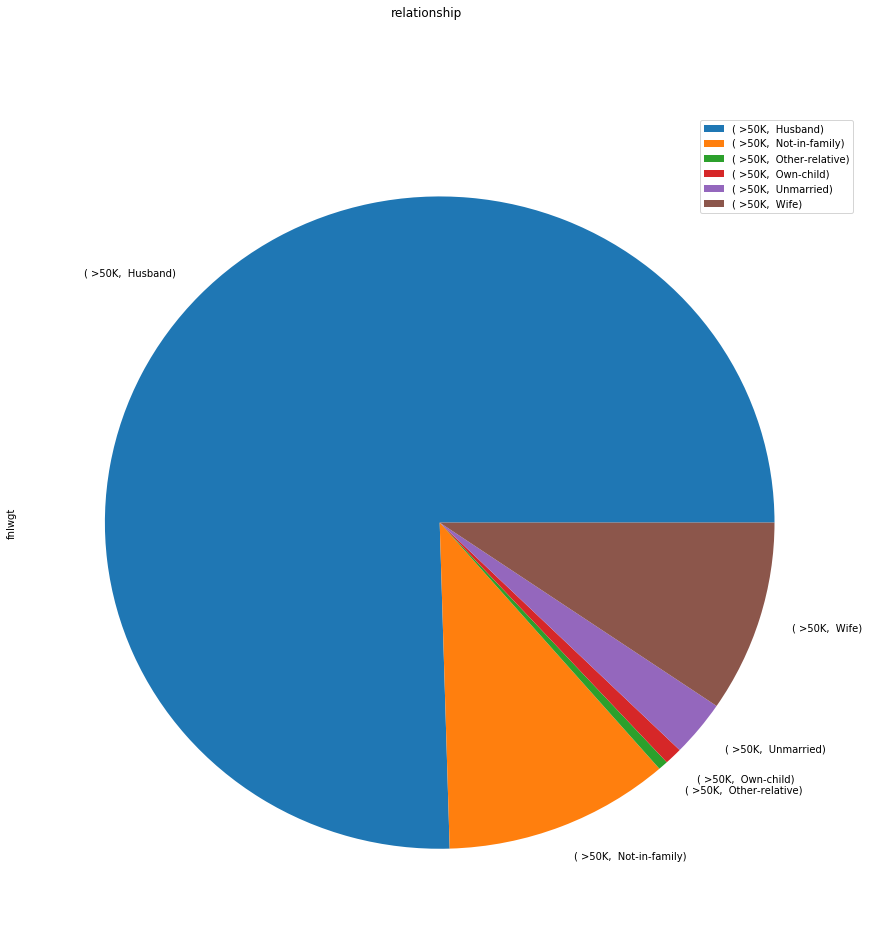

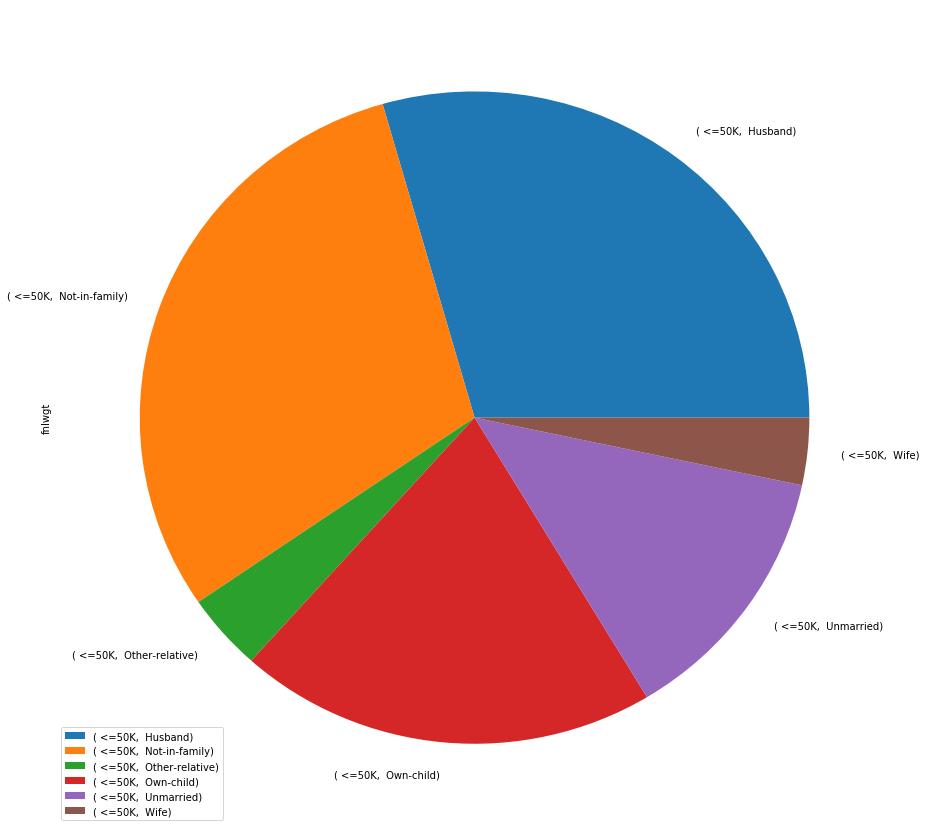

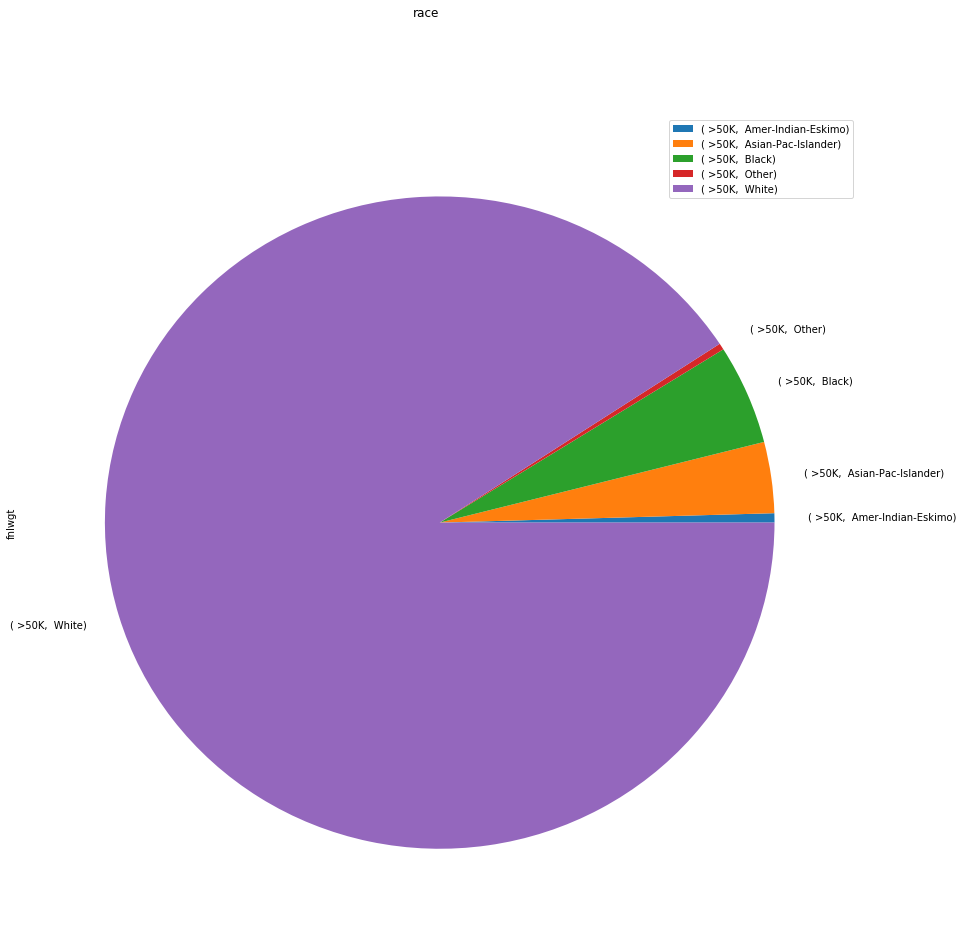

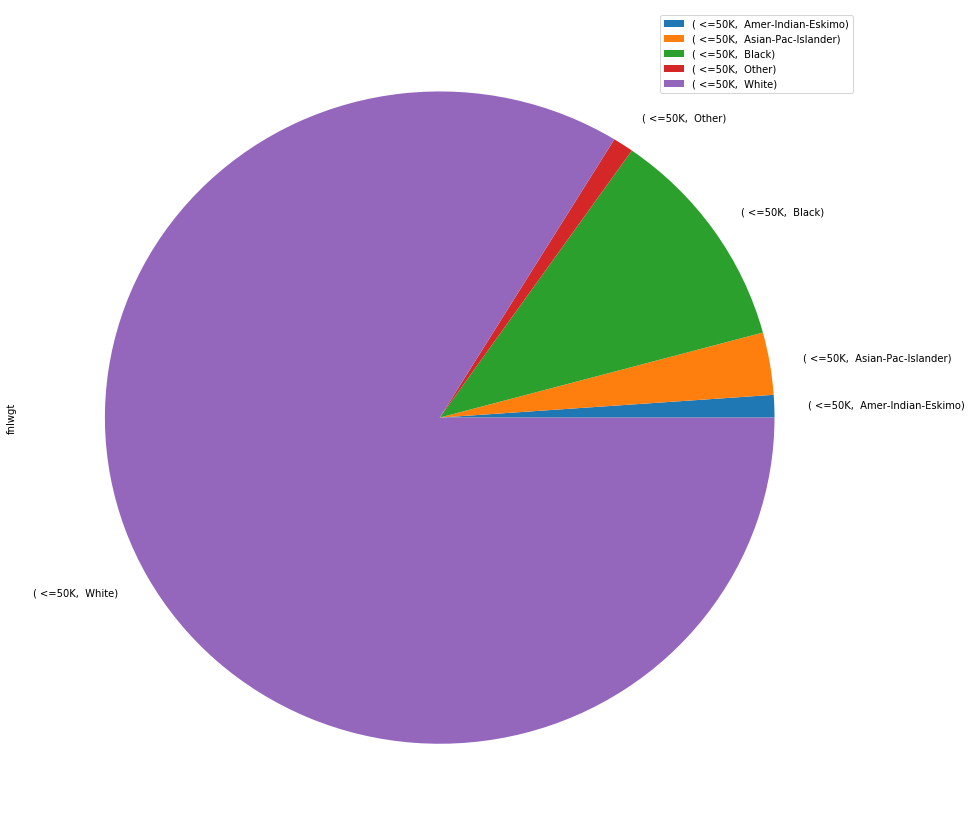

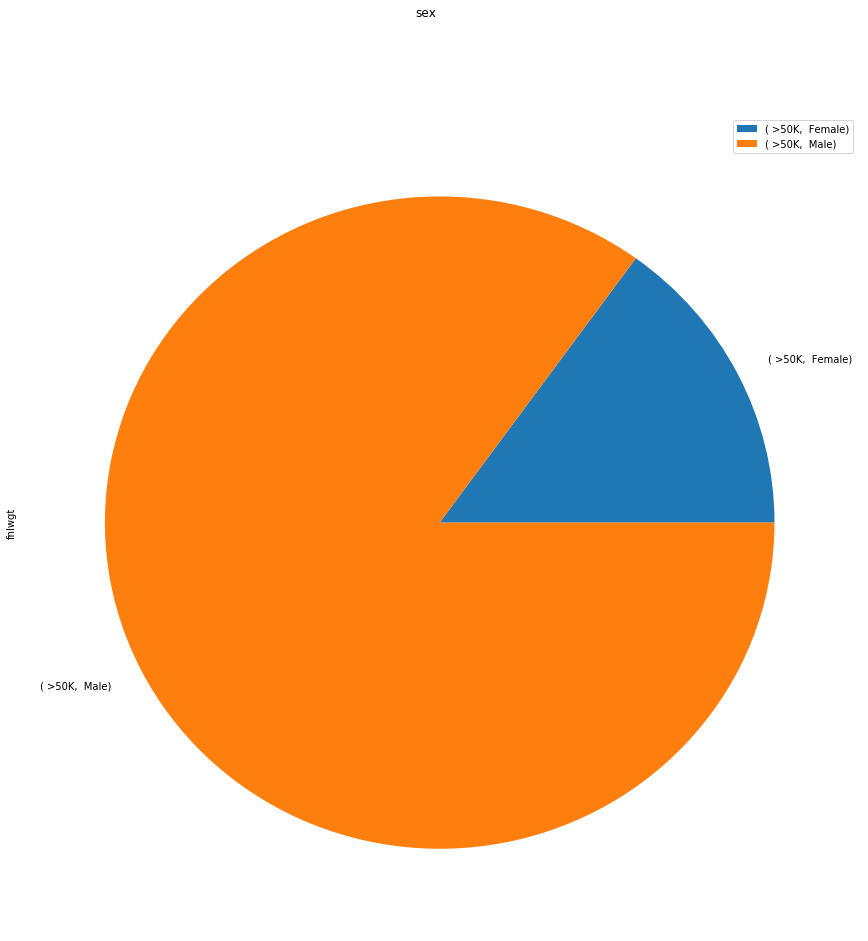

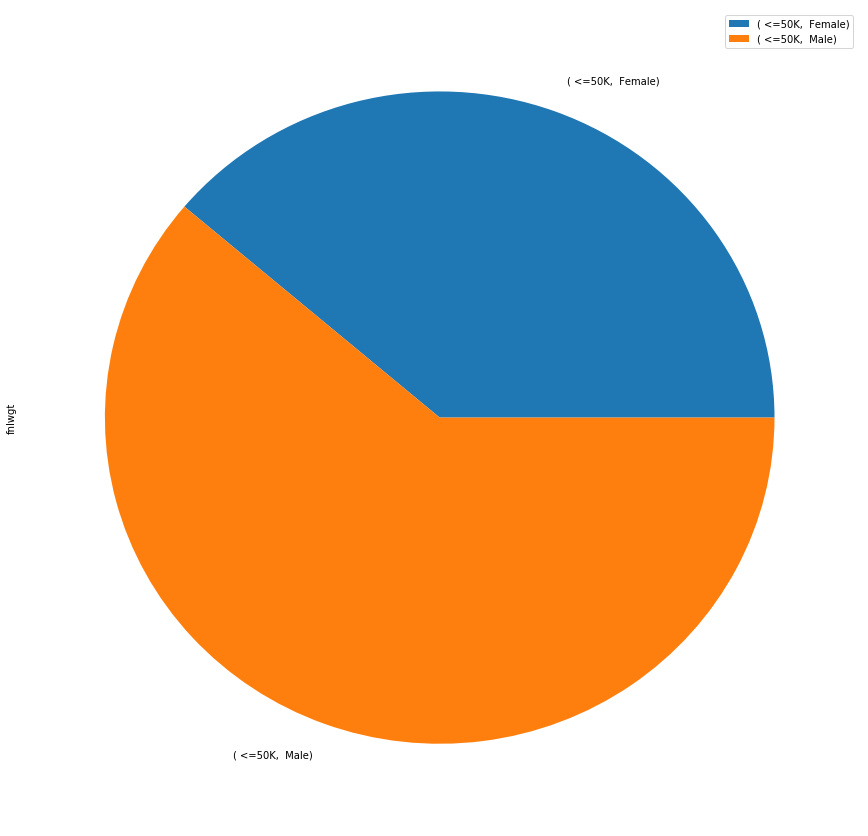

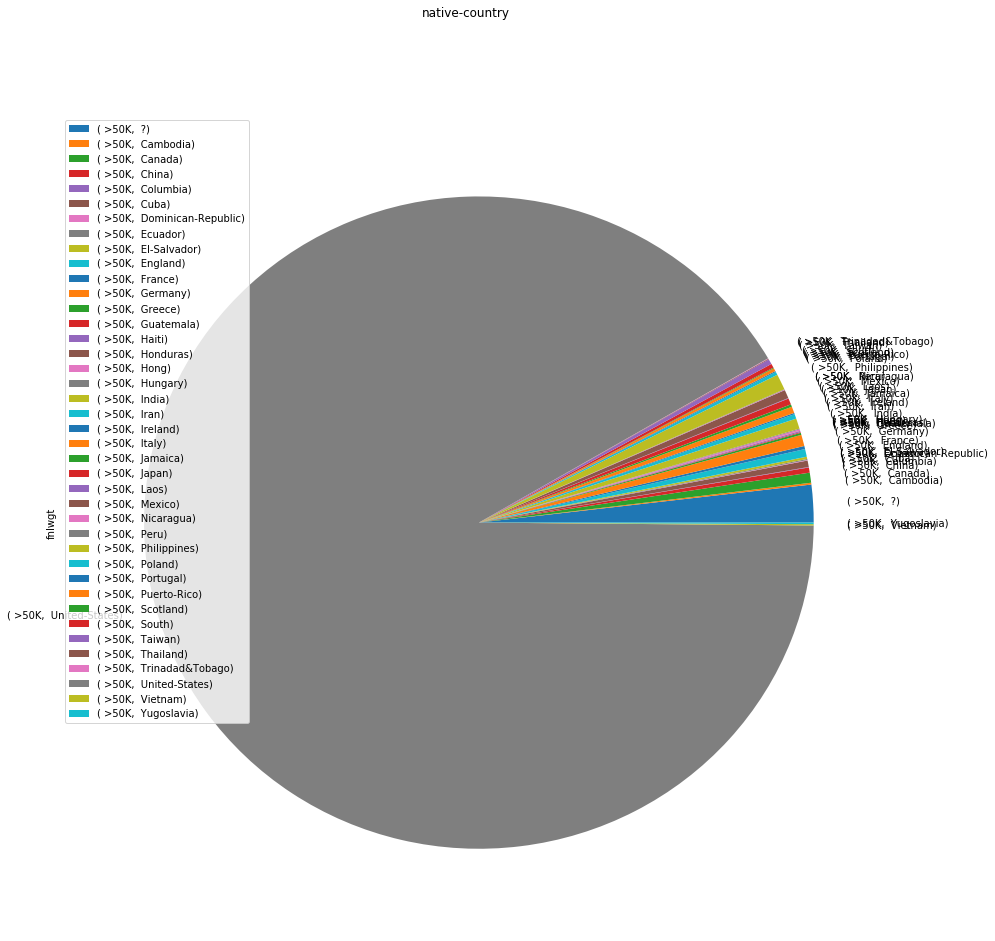

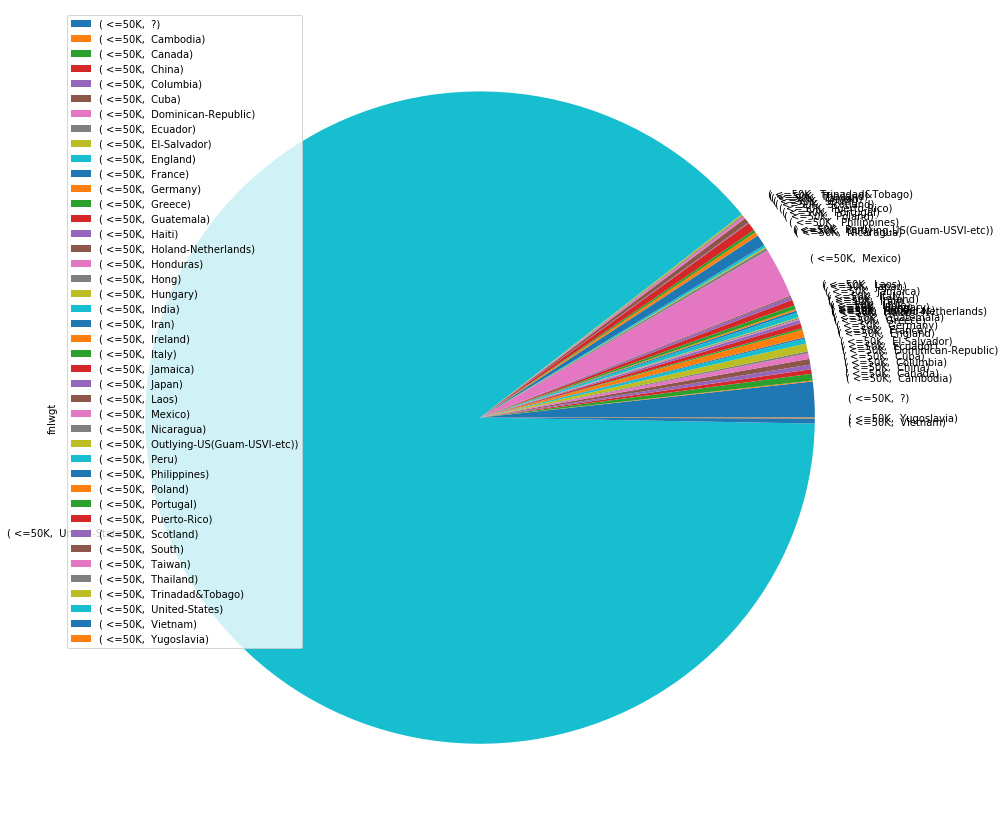

In [57]:
for c in list(ds.dtypes[ds.dtypes=='object'].index)[:-1]:
    try:
        gr_col(c)
    except:
        print(c,'Error')

## Scatter

In [63]:
ds2=ds.copy()

In [64]:
from sklearn import preprocessing

for c in tqdm_notebook(list(ds.dtypes[ds.dtypes=='object'].index)):
    le = preprocessing.LabelEncoder()
    ds2[c]=le.fit_transform(ds2[c])

In [66]:
ds2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,inc_class
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


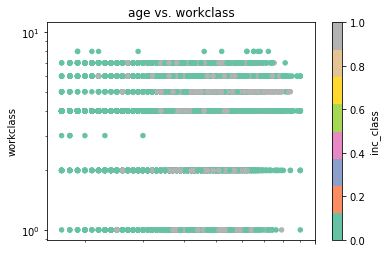

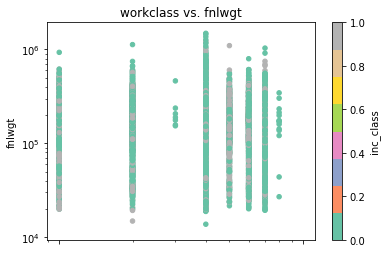

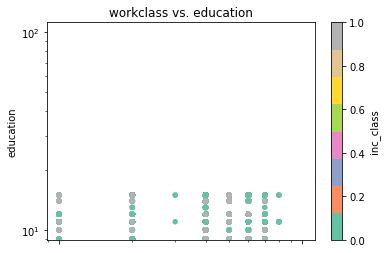

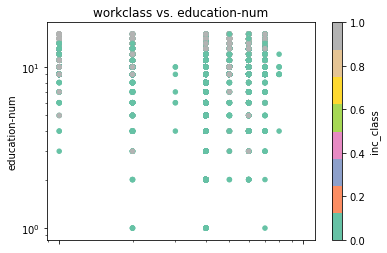

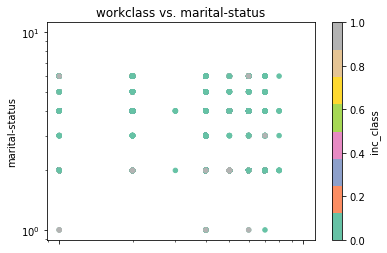

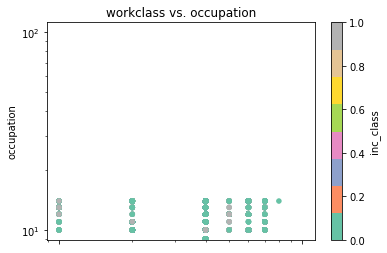

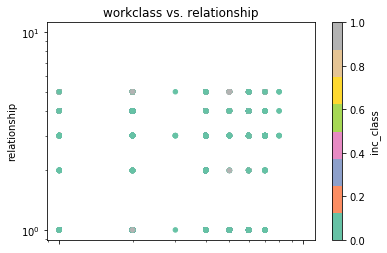

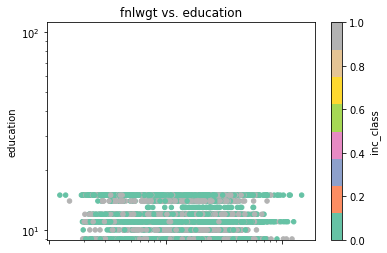

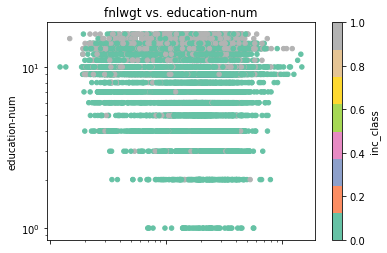

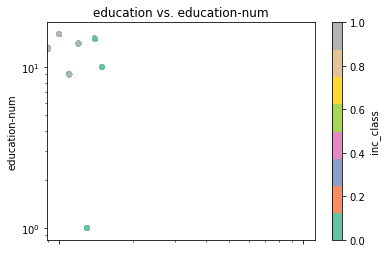

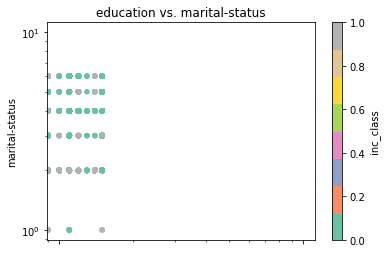

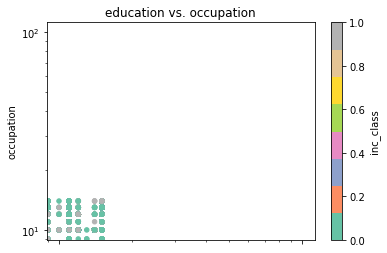

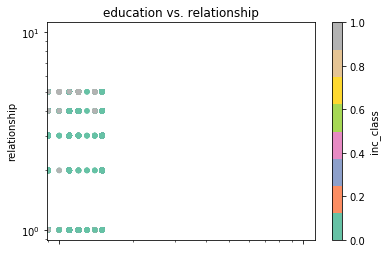

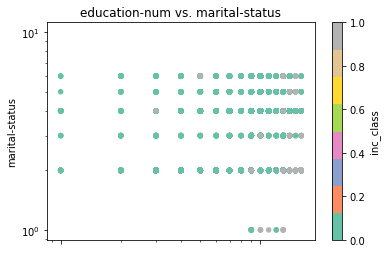

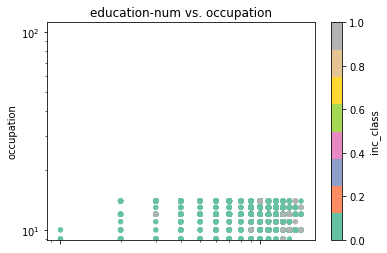

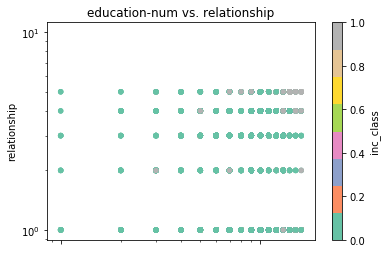

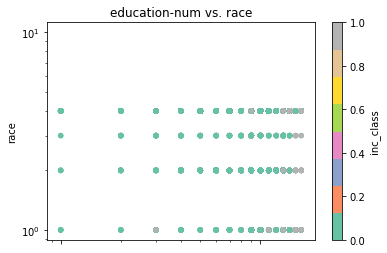

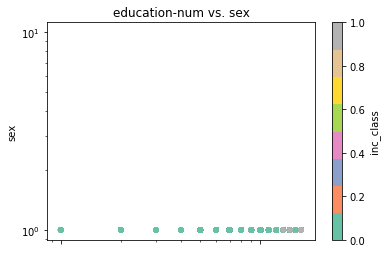

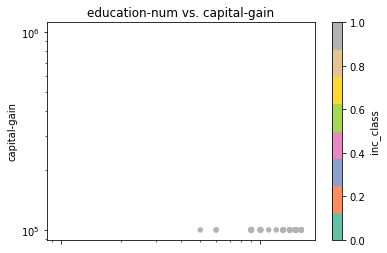

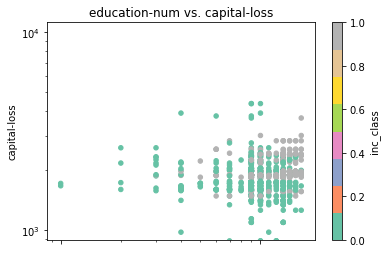

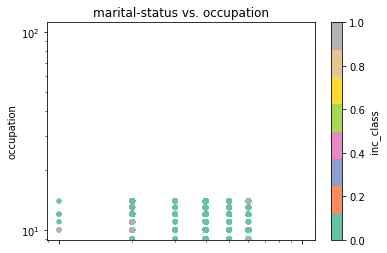

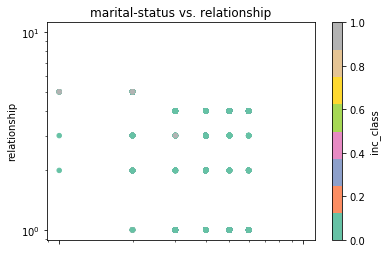

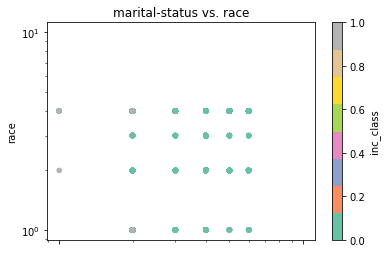

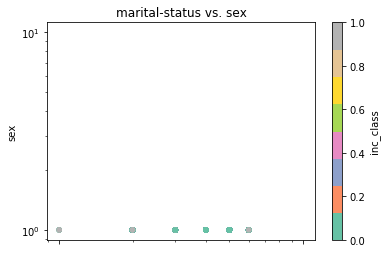

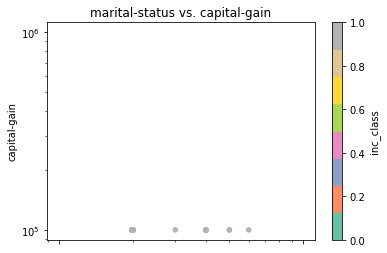

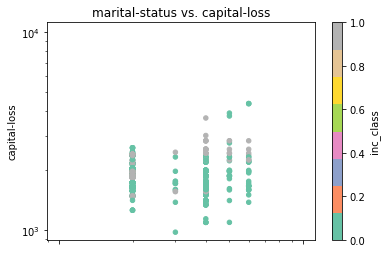

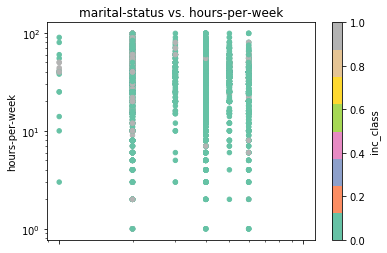

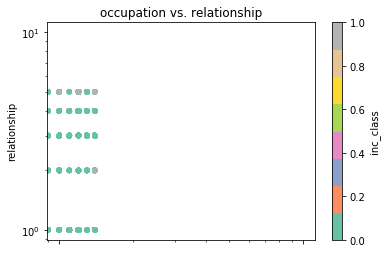

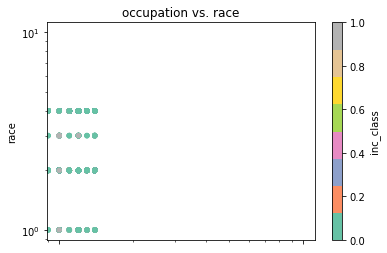

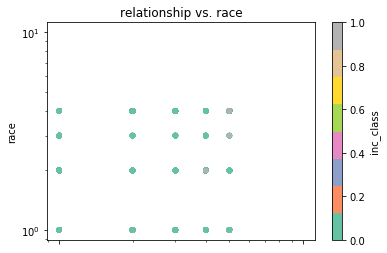

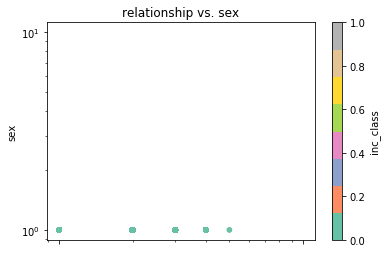

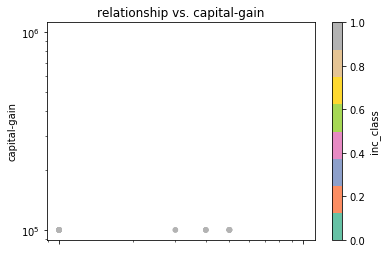

In [97]:
for i in range(len(ds2.columns[i])-1):
    for j in range(i+1,len(ds2.columns[i])-1):
        #print(i,j)
        ds2.plot(kind='scatter', x=ds2.columns[i], y=ds2.columns[j], colormap='Set2', c='inc_class', title=ds2.columns[i]+' vs. '+ds2.columns[j], loglog=True)

## Pairplot

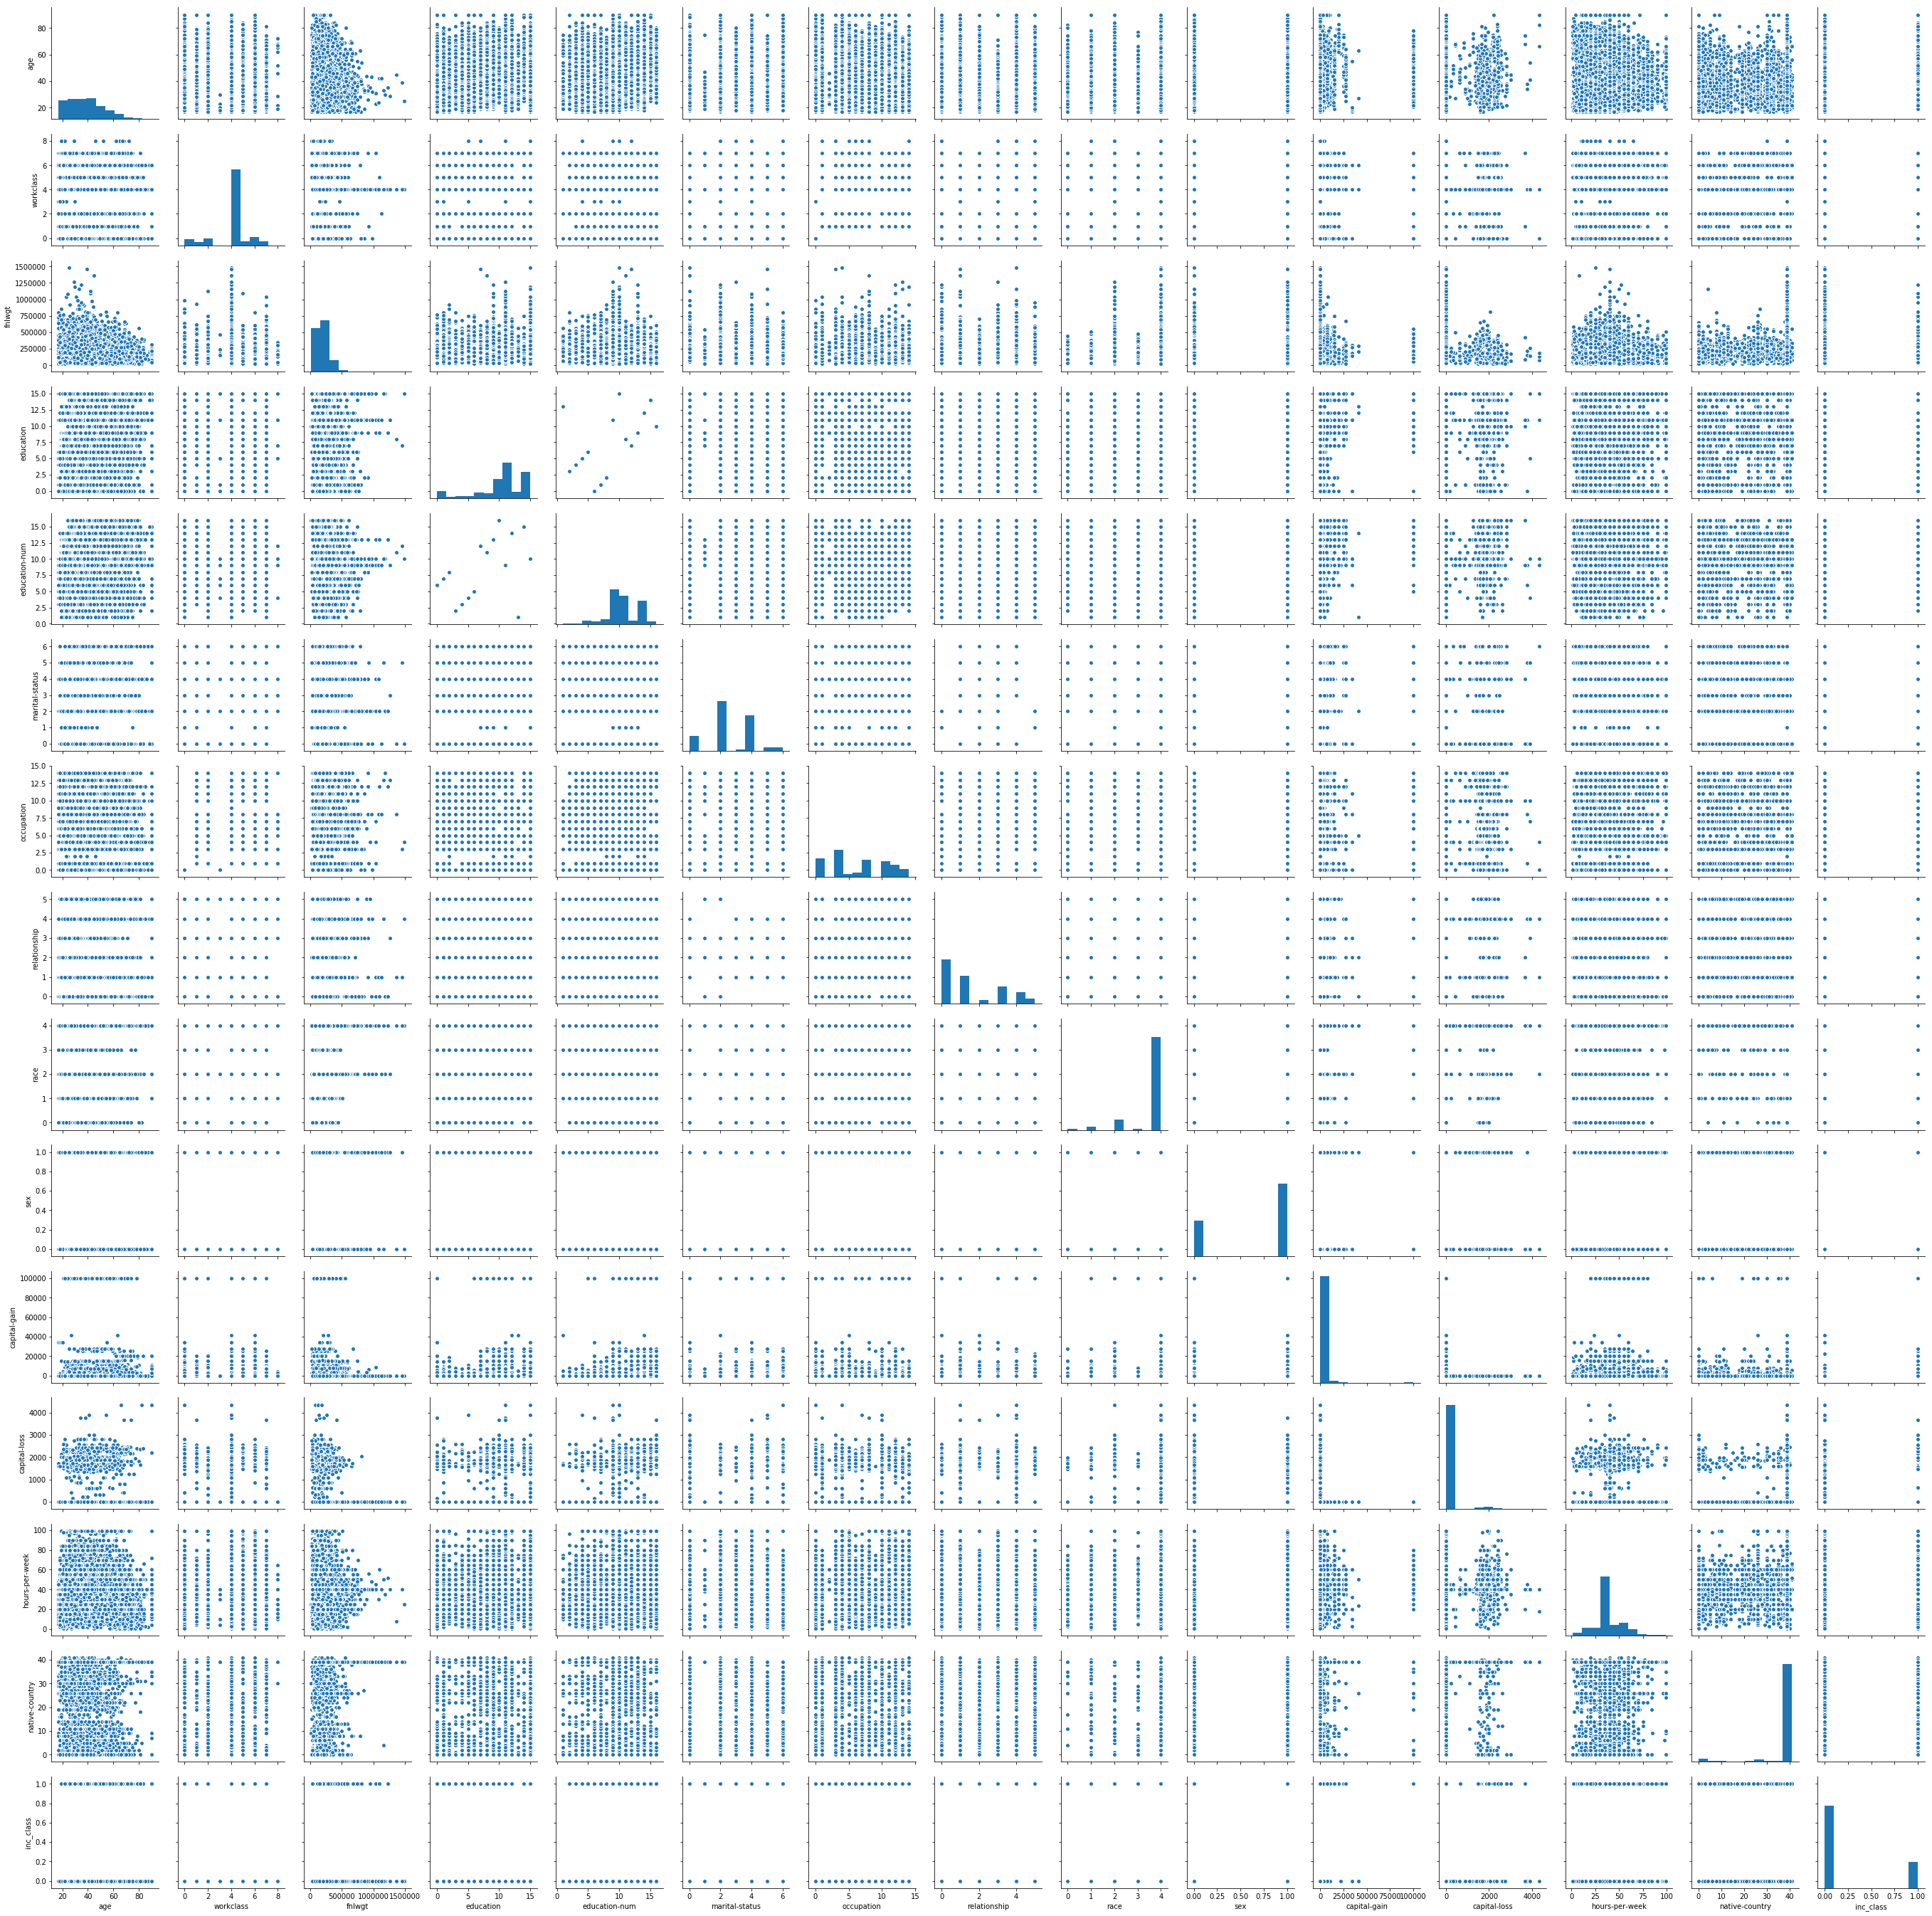

In [74]:
import seaborn as sns
sns.pairplot(ds2)

## Heatmap

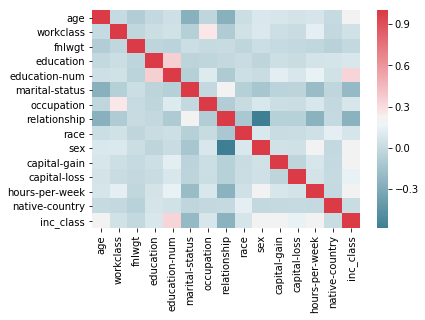

In [75]:
corr = ds2.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))

## Important features

In [80]:
from sklearn.ensemble import GradientBoostingClassifier

In [83]:
x=ds2.iloc[:,:-1]
y=ds2.inc_class

In [84]:
clf = GradientBoostingClassifier()
clf.fit(x, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [85]:
clf.score(x,y)

0.8682165781149228

In [86]:
clf.feature_importances_

array([6.22770423e-02, 4.23691638e-03, 2.93030448e-03, 1.77262753e-04,
       2.04569399e-01, 2.39566930e-02, 2.23045797e-02, 3.50066336e-01,
       6.22280133e-04, 5.62738040e-03, 2.22293382e-01, 6.15633049e-02,
       3.82960168e-02, 1.07910254e-03])

In [91]:
feat_ds=pd.DataFrame()
feat_ds['feat_name']=x.columns
feat_ds['importance']=clf.feature_importances_
feat_ds.sort_values(by='importance', ascending=False)

,feat_name,importance
7,relationship,0.350066
10,capital-gain,0.222293
4,education-num,0.204569
0,age,0.062277
11,capital-loss,0.061563
12,hours-per-week,0.038296
5,marital-status,0.023957
6,occupation,0.022305
9,sex,0.005627
1,workclass,0.004237


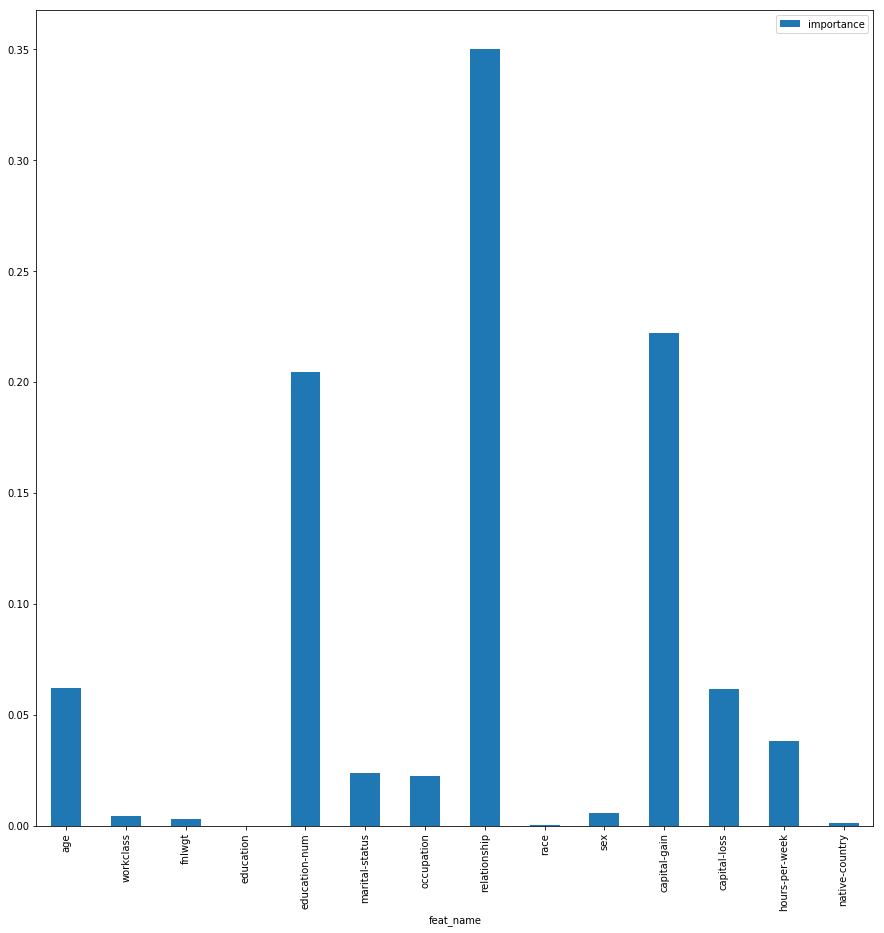

In [96]:
feat_ds.plot(kind='bar', x='feat_name', figsize=(15,15))

# Data preprocessing

In [8]:
ds.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
inc_class         0
dtype: int64

In [ ]:
Basic steps:
    -NANs
    -Cat feat enc
    -balancing dataset